## Title: 

#### PREDICTIVE QUESTION:  "Given latitude, longitude, and time of occurrence of a crime, we want to predict what type of crime will take place."

**Introduction:**

 * Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
 * Clearly state the question you will try to answer with your project
 * Identify and describe the dataset that will be used to answer the question

 **Preliminary exploratory data analysis:**
 
 * Demonstrate that the dataset can be read from the web into R
 * Clean and wrangle your data into a tidy format
 * Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data.
 * Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

**Methods:**

 * Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
   
 * Describe at least one way that you will visualize the results
 
*Among the variables in our dataset, we will be using the type of crime as our target value and hour, minute, latitude and longitude as prediction variables. We will further be combining the minute and hour variables into a single variable that represents the percentage of the day the crime occurred at (e.g. 12:00 PM would convert to 0.5). We are omitting X and Y due to redundancy and choosing not to use month and hundred_block as we don’t believe them to be very relevant measurements for our analysis. Furthermore, we are choosing to focus on crimes committed during 2017, as there is simply too much data otherwise and R has a hard time doing the computations necessary with the entire dataset.*

*In this project, we plan to carry out a KNN classification using time, latitude and longitude to predict the crime type of a given crime (categorical value). As is common practice, we will also be scaling, splitting, optimizing the nearest-neighbour value, cross-validating and finally using the model to predict on new crime data. We will visualize our results with a KNN scatter plot.* 


**Expected outcomes and significance:**

 1. What do you expect to find?
 2. What impact could such findings have?
 3. What future questions could this lead to?

#### LIBRARY DOWNLOADS:

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

#### GIT READING: 

In [2]:
download.file("https://raw.githubusercontent.com/ireneberezin/DSCI-PROJECT-38/main/data/crime.csv", "crime_data.csv")

In [3]:
crime_data <- read_csv("crime_data.csv")
crime_data

Rows: 530652 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (9): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y, Latitude, Longitude

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Other Theft,2003,5,12,16,15,9XX TERMINAL AVE,Strathcona,493906.5,5457452,49.2698,-123.0838
Other Theft,2003,5,7,15,20,9XX TERMINAL AVE,Strathcona,493906.5,5457452,49.2698,-123.0838
Other Theft,2003,4,23,16,40,9XX TERMINAL AVE,Strathcona,493906.5,5457452,49.2698,-123.0838
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Offence Against a Person,2017,4,13,NA,NA,OFFSET TO PROTECT PRIVACY,NA,0.0,0,0.00000,0.0000
Theft from Vehicle,2017,6,5,17,0,8XX HAMILTON ST,Central Business District,491487.8,5458386,49.27817,-123.1170
Vehicle Collision or Pedestrian Struck (with Injury),2017,6,6,17,38,13XX BLOCK PARK DR,Marpole,490204.0,5451444,49.21571,-123.1345


## Data wrangling and summarization

We used multiple tables to ensure that our data remained tidy.

In [4]:
crime_data_filtered <- crime_data|>
rename(c("type_of_crime"=TYPE, "Year"=YEAR, "Month"=MONTH, "Day"=DAY, "Hour"=HOUR,
         "Minute"=MINUTE, "block_location"=HUNDRED_BLOCK, "Neighborhood"=NEIGHBOURHOOD))|>
filter(Year==2017)|>
rowwise()|>
mutate(minute_hour = Minute+Hour*60)|>
mutate(percent_day = minute_hour/1440*100)|>
select(-Hour, -Minute, -minute_hour)

crime_data_filtered

type_of_crime,Year,Month,Day,block_location,Neighborhood,X,Y,Latitude,Longitude,percent_day
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Theft from Vehicle,2017,5,3,13XX ALBERNI ST,West End,490724.2,5459449,49.28772,-123.1276,39.79167
Offence Against a Person,2017,4,4,OFFSET TO PROTECT PRIVACY,NA,0.0,0,0.00000,0.0000,NA
Offence Against a Person,2017,3,27,OFFSET TO PROTECT PRIVACY,NA,0.0,0,0.00000,0.0000,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Offence Against a Person,2017,4,13,OFFSET TO PROTECT PRIVACY,NA,0.0,0,0.00000,0.0000,NA
Theft from Vehicle,2017,6,5,8XX HAMILTON ST,Central Business District,491487.8,5458386,49.27817,-123.1170,70.83333
Vehicle Collision or Pedestrian Struck (with Injury),2017,6,6,13XX BLOCK PARK DR,Marpole,490204.0,5451444,49.21571,-123.1345,73.47222


In [5]:
set.seed(4235)
crime_split <- initial_split(crime_data_filtered, prop = 0.75, strata = type_of_crime)
crime_train <- training(crime_split)
crime_test <- testing(crime_split) 

In [6]:
missing <- map_df(crime_train, ~sum(is.na(.)))|>
pivot_longer(cols=type_of_crime:percent_day, names_to="variable", values_to="missing_values")|>
filter(missing_values>0)
missing

crime_summary <- crime_train |>
count(type_of_crime)|>
rename(c("Count"=n))|>
arrange(desc(Count))
crime_summary 

predictor_info <- crime_train|>
select(-type_of_crime, -Year, -Neighborhood, -block_location)|>
mutate(across(Month:Day, as.integer))|>
drop_na()|>
map_df(mean)|>
pivot_longer(cols=Month:percent_day, names_to="predictor_variable", values_to="mean")
predictor_info

variable,missing_values
<chr>,<int>
Neighborhood,1238
percent_day,1211


type_of_crime,Count
<chr>,<int>
Theft from Vehicle,4477
Other Theft,2149
Mischief,1927
⋮,⋮
Vehicle Collision or Pedestrian Struck (with Injury),492
Homicide,9
Vehicle Collision or Pedestrian Struck (with Fatality),5


predictor_variable,mean
<chr>,<dbl>
Month,3.849672e+00
Day,1.473571e+01
X,4.921819e+05
⋮,⋮
Latitude,49.26534
Longitude,-123.10746
percent_day,58.55526


## DATA VISUALIZATION

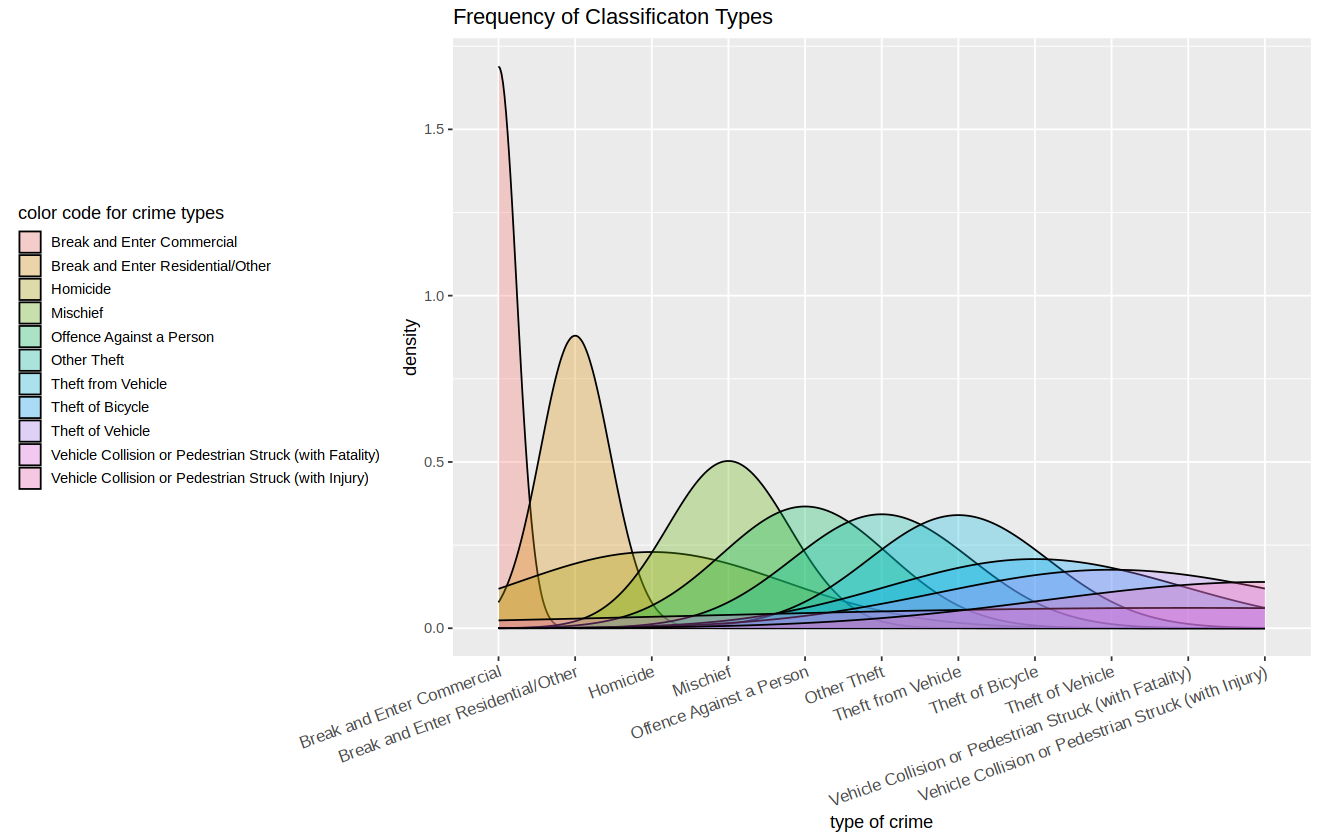

In [7]:
options(repr.plot.height = 7, repr.plot.width = 11)

crime_viz_type <- crime_train |>
ggplot(aes(x= type_of_crime, fill=type_of_crime))+geom_density(alpha=0.3)+
labs(x="type of crime", fill="color code for crime types")+ggtitle("Frequency of Classificaton Types") + 
theme(axis.text.x = element_text(size=10, angle = 20, vjust = 1, hjust=1))+
 theme(legend.key.size = unit(0.5, 'cm'))+
theme(legend.position = "left")
crime_viz_type
